In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [10]:
df = pd.read_csv("../data/iiwase_log_one_abag2.csv", header=None, 
                names=["time", "activity", "stream", "signal", "value"], parse_dates=["time"])

df_cartx = df[df["signal"]=="cart_x"]
df_carty = df[df["signal"]=="cart_y"]
df_cartz = df[df["signal"]=="cart_z"]
df_cartx.head()


,time,activity,stream,signal,value
0,2023-01-25 15:38:08.990,estimation,info,cart_x,0.0
24,2023-01-25 15:38:08.998,estimation,info,cart_x,0.0
48,2023-01-25 15:38:09.006,estimation,info,cart_x,0.0
72,2023-01-25 15:38:09.014,estimation,info,cart_x,0.0
96,2023-01-25 15:38:09.022,estimation,info,cart_x,0.0


In [11]:
df_cartx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2496 entries, 0 to 75826
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   time      2496 non-null   datetime64[ns]
 1   activity  2496 non-null   object        
 2   stream    2496 non-null   object        
 3   signal    2496 non-null   object        
 4   value     2496 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 117.0+ KB


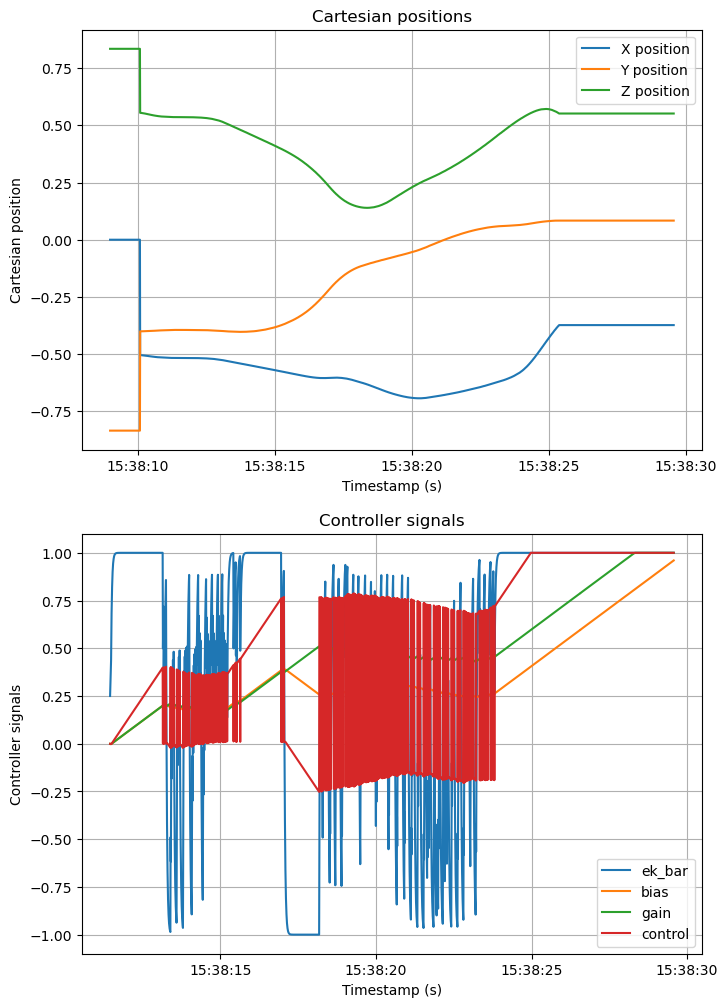

In [18]:
fig, [ax1,ax2] = plt.subplots(2, 1, figsize=(8, 12))

ax1.plot(df_cartx["time"], df_cartx["value"], label="X position")
ax1.plot(df_carty["time"], df_carty["value"], label="Y position")
ax1.plot(df_cartz["time"], df_cartz["value"], label="Z position")

ax1.legend()

ax1.set(xlabel="Timestamp (s)", ylabel="Cartesian position", title="Cartesian positions")
ax1.grid(True)

#fig.savefig("../docs/figs/jnt_vel_signal.svg", bbox_inches='tight')

# Plotting the signals of the controller 
df1 = df[df["signal"]=="ek_bar"]
df2 = df[df["signal"]=="bias"]
df3 = df[df["signal"]=="gain"]
df4 = df[df["signal"]=="control"]

ax2.plot(df1["time"], df1["value"], label='ek_bar')
ax2.plot(df2["time"], df2["value"], label='bias')
ax2.plot(df3["time"], df3["value"], label='gain')
ax2.plot(df4["time"], df4["value"], label='control')

ax2.legend()
ax2.set(xlabel="Timestamp (s)", ylabel="Controller signals", title="Controller signals")
ax2.grid(True)
